In [5]:
# Importing all necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,GlobalMaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

img_width, img_height = 100, 100


In [6]:
train_data_dir = 'Dataset/train'
validation_data_dir = 'Dataset/test'

############ Partie a modifiée ################
epochs = 12
###############################################

batch_size = 16

In [7]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_data_dir,  # this is the target directory
        target_size=(img_width, img_height),  # all images will be resized to 200x350
        batch_size=batch_size, class_mode='categorical'
        )  

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,class_mode='categorical'
        )

FileNotFoundError: [WinError 3] Le chemin d’accès spécifié est introuvable: 'Dataset/train'

In [5]:
############ Partie a modifiée ################

nb_train_samples = 259 
nb_validation_samples =65

###############################################

In [6]:
model = Sequential()

############ Partie a modifiée ################
model.add(Conv2D(60, (3, 3), input_shape=(img_width, img_height, 3),data_format='channels_last'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(60, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(79, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(GlobalMaxPooling2D()) 
model.add(Dense(79))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#################################################

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 60)        1680      
                                                                 
 activation (Activation)     (None, 98, 98, 60)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 60)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 60)        32460     
                                                                 
 activation_1 (Activation)   (None, 47, 47, 60)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 60)       0         
 2D)                                                    

In [7]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

C:\Users\usuario\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/300
16/16 [==============================] - 6266s 418s/step - loss: 2.3195 - accuracy: 0.0864 - val_loss: 2.2691 - val_accuracy: 0.1250
Epoch 2/300
16/16 [==============================] - 8s 502ms/step - loss: 2.2958 - accuracy: 0.1276 - val_loss: 2.2667 - val_accuracy: 0.1094
Epoch 3/300
16/16 [==============================] - 8s 510ms/step - loss: 2.2777 - accuracy: 0.1358 - val_loss: 2.2589 - val_accuracy: 0.1406
Epoch 4/300
16/16 [==============================] - 8s 506ms/step - loss: 2.2716 - accuracy: 0.1289 - val_loss: 2.2471 - val_accuracy: 0.1719
Epoch 5/300
16/16 [==============================] - 8s 504ms/step - loss: 2.2655 - accuracy: 0.1523 - val_loss: 2.2275 - val_accuracy: 0.1562
Epoch 6/300
16/16 [==============================] - 8s 490ms/step - loss: 2.2628 - accuracy: 0.1235 - val_loss: 2.2208 - val_accuracy: 0.1562
Epoch 7/300
16/16 [==============================] - 8s 497ms/step - loss: 2.2449 - accuracy: 0.1235 - val_loss: 2.2197 - val_accuracy: 0.17

16/16 [==============================] - 13s 780ms/step - loss: 0.3067 - accuracy: 0.8724 - val_loss: 0.3646 - val_accuracy: 0.8594
Epoch 114/300
16/16 [==============================] - 13s 791ms/step - loss: 0.3320 - accuracy: 0.8848 - val_loss: 0.0910 - val_accuracy: 0.9688
Epoch 115/300
16/16 [==============================] - 13s 788ms/step - loss: 0.2617 - accuracy: 0.9177 - val_loss: 0.2745 - val_accuracy: 0.9219
Epoch 116/300
16/16 [==============================] - 13s 790ms/step - loss: 0.3230 - accuracy: 0.8642 - val_loss: 0.1751 - val_accuracy: 0.9531
Epoch 117/300
16/16 [==============================] - 13s 780ms/step - loss: 0.2251 - accuracy: 0.9177 - val_loss: 0.2017 - val_accuracy: 0.9531
Epoch 118/300
16/16 [==============================] - 13s 795ms/step - loss: 0.2263 - accuracy: 0.9012 - val_loss: 0.1069 - val_accuracy: 0.9688
Epoch 119/300
16/16 [==============================] - 13s 788ms/step - loss: 0.2078 - accuracy: 0.9342 - val_loss: 0.1725 - val_accuracy:

16/16 [==============================] - 13s 782ms/step - loss: 0.1854 - accuracy: 0.9300 - val_loss: 0.1771 - val_accuracy: 0.9531
Epoch 226/300
16/16 [==============================] - 13s 783ms/step - loss: 0.1135 - accuracy: 0.9588 - val_loss: 0.0366 - val_accuracy: 0.9844
Epoch 227/300
16/16 [==============================] - 13s 784ms/step - loss: 0.0915 - accuracy: 0.9630 - val_loss: 0.1712 - val_accuracy: 0.9688
Epoch 228/300
16/16 [==============================] - 13s 799ms/step - loss: 0.1337 - accuracy: 0.9465 - val_loss: 0.6347 - val_accuracy: 0.8750
Epoch 229/300
16/16 [==============================] - 13s 795ms/step - loss: 0.0773 - accuracy: 0.9671 - val_loss: 0.0744 - val_accuracy: 0.9844
Epoch 230/300
16/16 [==============================] - 13s 777ms/step - loss: 0.2324 - accuracy: 0.9383 - val_loss: 0.0744 - val_accuracy: 0.9688
Epoch 231/300
16/16 [==============================] - 13s 770ms/step - loss: 0.1799 - accuracy: 0.9300 - val_loss: 0.0214 - val_accuracy:

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

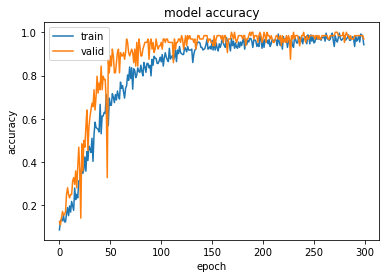

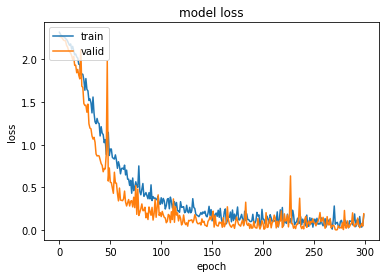

In [9]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [10]:
target_names = [
    'ابتسم', 
    'احتكاك', 
    'اسف', 
    'الم', 
    'حناء', 
    'شاي', 
    'شجرة', 
    'قليل', 
    'قهوة', 
    'متلا'
]

Y_pred = model.predict_generator(validation_generator, nb_validation_samples //  batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)


C:\Users\usuario\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:14: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


In [11]:
#pip install arabic_reshaper
#pip install python-bidi

In [12]:
import arabic_reshaper
from bidi.algorithm import get_display

In [13]:
reshaped_text = arabic_reshaper.reshape(target_names[0])

In [14]:
for i in range(10):
    res = arabic_reshaper.reshape(target_names[i])
    target_names[i] = get_display(res)

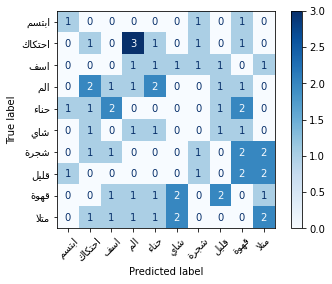

In [15]:
cm = confusion_matrix(validation_generator.classes, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)

disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()